In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# pour accéder aux fichiers
import os
# faire des opérations sur images
import cv2
# pour afficher images
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# afficher predictions
from sklearn.metrics import classification_report

In [2]:
import pathlib
import zipfile
import tensorflow as tf

urls = ["https://github.com/cai-i/image_classification/raw/train_test/resized_images.zip"] 
for url in urls :
  data_dir = tf.keras.utils.get_file(origin=url, extract=False)

  with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

56207202/56207202 [==============================] - 1s 0us/step


In [3]:
data_dir = pathlib.Path('/content/datasets/resized_images')
train_dir = pathlib.Path('/content/datasets/resized_images/train')
val_dir = pathlib.Path('/content/datasets/resized_images/val')
test_dir = pathlib.Path('/content/datasets/resized_images/test')

In [4]:
class_names = ['abeille', 'guepe', 'frelon']
class_names_label = { class_name:i for i, class_name in enumerate(class_names)}

print(class_names_label)

{'abeille': 0, 'guepe': 1, 'frelon': 2}


In [5]:
def load_data():

  dir = '/content/datasets/resized_images/'
  datasets = ['train', 'val', 'test']

  output = []

  for dataset in datasets:
    path = os.path.join(dir, dataset)
    images=[]
    labels=[]

    for category in os.listdir(path):
      label= class_names_label[category]
      cat_path = os.path.join(path, category)

      for img in os.listdir(cat_path):
        img_path = os.path.join(cat_path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # append to lists
        images.append(image)
        labels.append(label)
    
    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype = 'int32')

    output.append((images, labels))

  return output

In [6]:
(train_imgs, train_labels), (val_imgs, val_labels), (test_imgs, test_labels) = load_data()

**模型结构**



我将使用拥有 3 个卷积/池化层和 2 个全连接层的 CNN。3 个卷积层将分别使用 32，32，64 的 3 * 3的滤波器（fiter）。在两个全连接层，我使用了 dropout 来避免过拟合。

In [7]:
from keras.engine.sequential import Sequential
model = Sequential()

model.add(layers.Conv2D(32,(3,3), input_shape=(256,256,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [8]:
model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [10]:
history = model.fit(
    train_imgs,
    train_labels,
    batch_size= 32,
    epochs = 20,
    validation_data = (val_imgs, val_labels)
)

Epoch 1/20
99/99 [==============================] - 17s 73ms/step - loss: 38.8049 - accuracy: 0.3971 - val_loss: 1.0542 - val_accuracy: 0.3541
Epoch 2/20
99/99 [==============================] - 6s 62ms/step - loss: 0.9995 - accuracy: 0.4695 - val_loss: 1.1623 - val_accuracy: 0.5185
Epoch 3/20
99/99 [==============================] - 6s 62ms/step - loss: 0.8523 - accuracy: 0.5975 - val_loss: 1.2228 - val_accuracy: 0.5467
Epoch 4/20
99/99 [==============================] - 6s 62ms/step - loss: 0.7107 - accuracy: 0.6838 - val_loss: 1.1425 - val_accuracy: 0.5496
Epoch 5/20
99/99 [==============================] - 6s 63ms/step - loss: 0.5702 - accuracy: 0.7641 - val_loss: 0.9931 - val_accuracy: 0.6015
Epoch 6/20
99/99 [==============================] - 6s 62ms/step - loss: 0.4619 - accuracy: 0.8298 - val_loss: 1.0835 - val_accuracy: 0.5941
Epoch 7/20
99/99 [==============================] - 6s 62ms/step - loss: 0.3696 - accuracy: 0.8625 - val_loss: 1.1713 - val_accuracy: 0.5956
Epoch 8/20


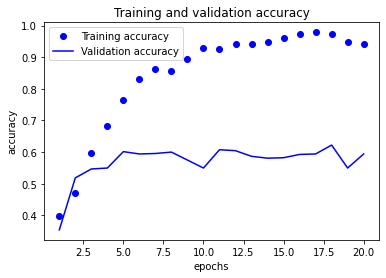

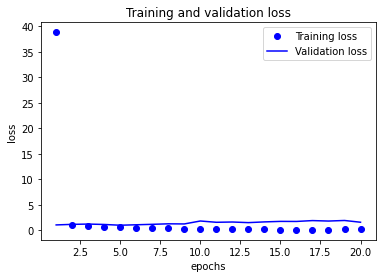

In [11]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [12]:
# pour voir intégralité de notre réseau de neuronnes
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [13]:
test_loss = model.evaluate(test_imgs, test_labels)

22/22 [==============================] - 1s 29ms/step - loss: 1.8646 - accuracy: 0.5615


In [14]:
predictions = model.predict(test_imgs)
pred_labels = np.argmax(predictions, axis=1)

print(classification_report(test_labels, pred_labels))

22/22 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       225
           1       0.57      0.59      0.58       225
           2       0.55      0.54      0.55       225

    accuracy                           0.56       675
   macro avg       0.56      0.56      0.56       675
weighted avg       0.56      0.56      0.56       675

